In [70]:

from pulp import LpVariable, LpMinimize, LpProblem, LpBinary

# Sample Data
M = 3 
N = 3  
S = [[0, 1, 0], [1, 0, 1], [0, 1, 0]]  # Similarity matrix

prob = LpProblem("AdScheduling", LpMinimize)

# Define Decision Variables
x = LpVariable.dicts("x", (range(M), range(N)), cat='Binary')
y = LpVariable.dicts("y", (range(M), range(M), range(N)), cat='Binary')

# Objective Function
objective = sum(S[i][k] * y[i][k][j] for i in range(M) for k in range(M) for j in range(N))
prob += objective

# Constraints:
for i in range(M):
    for k in range(M):
        for j in range(N):
            prob += y[i][k][j] <= x[i][j]
            prob += y[i][k][j] <= x[k][j]
            prob += y[i][k][j] >= x[i][j] + x[k][j] - 1


for i in range(M):
    prob += sum(x[i][j] for j in range(N)) == 1

prob.solve()


for i in range(M):
    for j in range(N):
        if x[i][j].value() == 1:
            print(f"Advertisement {i} is scheduled in slot {j}")
arr = []
for i in range(M):
    for j in range(N):
        #x[i][j].value().int
        arr.append(x[i][j].value())
        ## x[0][1] = 1
print(arr)
        
            

Advertisement 0 is scheduled in slot 2
Advertisement 1 is scheduled in slot 1
Advertisement 2 is scheduled in slot 0
[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]


In [41]:
from pyqubo import Array
from neal import SimulatedAnnealingSampler

# Sample Data
M = 3  # Number of advertisements
N = 3  # Number of ad slots in a break
S = [[0, 1, 0], [1, 0, 1], [0, 1, 0]] 

x = Array.create('x', shape=(M, N), vartype="BINARY")

# Objective Function:
objective = sum(S[i][k] * x[i][j] * x[k][j] for i in range(M) for k in range(M) for j in range(N))

constraints = [sum(x[i][j] for j in range(N)) - 1 for i in range(M)]

H = objective + sum(constraint**2 for constraint in constraints)

model = H.compile()
qubo, offset = model.to_qubo()

sampler = SimulatedAnnealingSampler()
response = sampler.sample_qubo(qubo)
solution = response.first.sample

decoded_solution = model.decode_sample(solution, vartype="BINARY")

print(decoded_solution)

for i in range(M):
    for j in range(N):
        if decoded_solution.array('x', (i, j)) == 1:
            print(f"Advertisement {i} is scheduled in slot {j}")


DecodedSolution({x[0][0]:0, x[0][1]:1, x[0][2]:0, x[1][0]:0, x[1][1]:0, x[1][2]:1, x[2][0]:1, x[2][1]:0, x[2][2]:0}, energy=0.000000)
Advertisement 0 is scheduled in slot 1
Advertisement 1 is scheduled in slot 2
Advertisement 2 is scheduled in slot 0


In [6]:
from pyqubo import Array
from neal import SimulatedAnnealingSampler

# Sample data
ads = [
    {"name": "Gold Winner", "duration": 15, "time": "06:18:45"},
    {"name": "Gold Winner", "duration": 15, "time": "06:07:35"},
    {"name": "Maruthua Grand Mother", "duration": 10, "time": "06:19:35"},
    {"name": "Maruthua Grand Mother", "duration": 10, "time": "06:08:40"},
    {"name": "AJMI Puttu Podi21 B", "duration": 10, "time": "06:19:05"},
    {"name": "AJMI Puttu Podi21 B", "duration": 10, "time": "06:08:30"}
]

M = len(ads)
N = len(set(ad["time"] for ad in ads)
       
       
       )

S = [[1 if ads[i]["name"] == ads[j]["name"] and i != j else 0 for j in range(M)] for i in range(M)]

x = Array.create('x', shape=(M, N), vartype="BINARY")

# Objective Function:
objective = sum(S[i][k] * x[i][j] * x[k][j] for i in range(M) for k in range(M) for j in range(N))

constraints = [sum(x[i][j] for j in range(N)) - 1 for i in range(M)]

H = objective + sum(constraint**2 for constraint in constraints)

model = H.compile()
qubo, offset = model.to_qubo()

sampler = SimulatedAnnealingSampler()
response = sampler.sample_qubo(qubo)
solution = response.first.sample

decoded_solution = model.decode_sample(solution, vartype="BINARY")

for i in range(M):
    for j in range(N):
        if decoded_solution.array('x', (i, j)) == 1:
            print(f"Advertisement '{ads[i]['name']}' scheduled at {ads[i]['time']} is placed in slot {j}")


Advertisement 'Gold Winner' scheduled at 06:18:45 is placed in slot 3
Advertisement 'Gold Winner' scheduled at 06:07:35 is placed in slot 5
Advertisement 'Maruthua Grand Mother' scheduled at 06:19:35 is placed in slot 5
Advertisement 'Maruthua Grand Mother' scheduled at 06:08:40 is placed in slot 0
Advertisement 'AJMI Puttu Podi21 B' scheduled at 06:19:05 is placed in slot 2
Advertisement 'AJMI Puttu Podi21 B' scheduled at 06:08:30 is placed in slot 1


In [7]:
# Extracting relevant data from the provided dataset
ads = [
    {"product": "GOLD WINNER", "time": "06:18:45"},
    {"product": "GOLD WINNER", "time": "06:07:35"},
    {"product": "MARUTHUA GRAND MOTHER", "time": "06:19:35"},
    {"product": "MARUTHUA GRAND MOTHER", "time": "06:08:40"},
    {"product": "AJMI PUTTU PODI21 B", "time": "06:19:05"},
    {"product": "AJMI PUTTU PODI21 B", "time": "06:08:30"}
]


In [9]:
from pyqubo import Array
from neal import SimulatedAnnealingSampler

M = len(ads)
N = len(set(ad["time"] for ad in ads))

S = [[1 if ads[i]["product"] == ads[j]["product"] and i != j else 0 for j in range(M)] for i in range(M)]

x = Array.create('x', shape=(M, N), vartype="BINARY")
objective = sum(S[i][k] * x[i][j] * x[k][j] for i in range(M) for k in range(M) for j in range(N))

constraints = [sum(x[i][j] for j in range(N)) - 1 for i in range(M)]


H = objective + sum(constraint**2 for constraint in constraints)

model = H.compile()
qubo, offset = model.to_qubo()

sampler = SimulatedAnnealingSampler()
response = sampler.sample_qubo(qubo)
solution = response.first.sample

decoded_solution = model.decode_sample(solution, vartype="BINARY")

for i in range(M):
    for j in range(N):
        if decoded_solution.array('x', (i, j)) == 1:
            print(f"Advertisement for product '{ads[i]['product']}' scheduled at {ads[i]['time']} is placed in slot {j}")


Advertisement for product 'GOLD WINNER' scheduled at 06:18:45 is placed in slot 3
Advertisement for product 'GOLD WINNER' scheduled at 06:07:35 is placed in slot 5
Advertisement for product 'MARUTHUA GRAND MOTHER' scheduled at 06:19:35 is placed in slot 3
Advertisement for product 'MARUTHUA GRAND MOTHER' scheduled at 06:08:40 is placed in slot 4
Advertisement for product 'AJMI PUTTU PODI21 B' scheduled at 06:19:05 is placed in slot 0
Advertisement for product 'AJMI PUTTU PODI21 B' scheduled at 06:08:30 is placed in slot 2


In [1]:
from pyqubo import Array
from neal import SimulatedAnnealingSampler

# Sample Data
M = 3  # Number of advertisements
N = 5  # Number of ad slots in a break
S = [[0, 1, 0], [1, 0, 1], [0, 1, 0]]

x = Array.create('x', shape=(M, N), vartype="BINARY")

# Objective Function:
objective = sum(S[i][k] * x[i][j] * x[k][j] for i in range(M) for k in range(M) for j in range(N))

constraints = [sum(x[i][j] for j in range(N)) - 1 for i in range(M)]

H = objective + sum(constraint**2 for constraint in constraints)

model = H.compile()
qubo, offset = model.to_qubo()
print(qubo)

sampler = SimulatedAnnealingSampler()
response = sampler.sample_qubo(qubo)
solution = response.first.sample

decoded_solution = model.decode_sample(solution, vartype="BINARY")

for i in range(M):
    for j in range(N):
        if decoded_solution.array('x', (i, j)) == 1:
            print(f"Advertisement {i} is scheduled in slot {j}")

print (decoded_solution)
print (solution)

{('x[1][3]', 'x[1][1]'): 2.0, ('x[1][4]', 'x[1][1]'): 2.0, ('x[1][2]', 'x[0][2]'): 2.0, ('x[1][1]', 'x[1][0]'): 2.0, ('x[0][4]', 'x[0][0]'): 2.0, ('x[2][1]', 'x[2][0]'): 2.0, ('x[2][4]', 'x[2][1]'): 2.0, ('x[0][3]', 'x[0][0]'): 2.0, ('x[2][2]', 'x[2][1]'): 2.0, ('x[2][4]', 'x[1][4]'): 2.0, ('x[2][3]', 'x[2][2]'): 2.0, ('x[2][0]', 'x[1][0]'): 2.0, ('x[2][3]', 'x[2][3]'): -1.0, ('x[1][4]', 'x[0][4]'): 2.0, ('x[0][2]', 'x[0][1]'): 2.0, ('x[1][1]', 'x[1][1]'): -1.0, ('x[0][3]', 'x[0][1]'): 2.0, ('x[2][4]', 'x[2][0]'): 2.0, ('x[2][3]', 'x[2][0]'): 2.0, ('x[0][1]', 'x[0][0]'): 2.0, ('x[1][3]', 'x[1][0]'): 2.0, ('x[0][2]', 'x[0][2]'): -1.0, ('x[2][1]', 'x[1][1]'): 2.0, ('x[1][0]', 'x[1][0]'): -1.0, ('x[2][4]', 'x[2][3]'): 2.0, ('x[2][2]', 'x[2][0]'): 2.0, ('x[2][3]', 'x[1][3]'): 2.0, ('x[0][4]', 'x[0][2]'): 2.0, ('x[1][3]', 'x[1][2]'): 2.0, ('x[2][3]', 'x[2][1]'): 2.0, ('x[0][4]', 'x[0][3]'): 2.0, ('x[1][3]', 'x[0][3]'): 2.0, ('x[2][4]', 'x[2][2]'): 2.0, ('x[2][2]', 'x[2][2]'): -1.0, ('x[0][4

In [24]:
import numpy as np
import copy
import qiskit_algorithms

# Problem modelling imports
from docplex.mp.model import Model

import qiskit_algorithms

# Qiskit imports
from qiskit.algorithms.minimum_eigensolvers import QAOA, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler
from qiskit.utils.algorithm_globals import algorithm_globals
from qiskit_optimization.algorithms import MinimumEigenOptimizer, CplexOptimizer
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.problems.variable import VarType
from qiskit_optimization.converters.quadratic_program_to_qubo import QuadraticProgramToQubo
from qiskit_optimization.translators import from_docplex_mp
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.algorithms import CplexOptimizer

In [53]:
import numpy as np
def create_problem(s, M: int = 3, N: int = 5) -> QuadraticProgram:
    """Solve the quadratic program using docplex."""

    mdl = Model()
    x = [[mdl.binary_var(f"x{i}_{j}") for j in range(len(s))] for i in range(len(s))]

    # Define the objective and constraints
    objective = mdl.sum(s[i][k] * x[i][j] * x[k][j] for i in range(len(s)) for k in range(len(s)) for j in range(len(s)))
    constraints = [mdl.sum(x[i][j] for j in range(len(s))) == 1 for i in range(len(s))]

    # Add objective and constraints to the model
    mdl.minimize(objective)
    mdl.add_constraints(constraints)

    qp = from_docplex_mp(mdl)
    return qp


def relax_problem(problem) -> QuadraticProgram:
    """Change all variables to continuous."""
    relaxed_problem = copy.deepcopy(problem)
    for variable in relaxed_problem.variables:
        variable.vartype = VarType.CONTINUOUS

    return relaxed_problem

# def relax_problem(problem) -> QuadraticProgram:
#     """Relax binary constraints while keeping the quadratic objective."""
#     relaxed_problem = copy.deepcopy(problem)

#     for variable in relaxed_problem.variables:
#         if variable.vartype == VarType.BINARY:
#             variable.vartype = VarType.CONTINUOUS

#     return relaxed_problem


In [54]:
M = 3  # Number of advertisements
N = 3  # Number of ad slots in a break
S = [[0, 1, 0], [1, 0, 1], [0, 5, 0]]
s = np.array(S)

In [55]:
qubo = create_problem(s, M, N)
print(qubo.prettyprint())

Problem name: docplex_model5

Minimize
  2*x0_0*x1_0 + 2*x0_1*x1_1 + 2*x0_2*x1_2 + 6*x1_0*x2_0 + 6*x1_1*x2_1
  + 6*x1_2*x2_2

Subject to
  Linear constraints (3)
    x0_0 + x0_1 + x0_2 == 1  'c0'
    x1_0 + x1_1 + x1_2 == 1  'c1'
    x2_0 + x2_1 + x2_2 == 1  'c2'

  Binary variables (9)
    x0_0 x0_1 x0_2 x1_0 x1_1 x1_2 x2_0 x2_1 x2_2



In [56]:
result = CplexOptimizer().solve(qubo)
print(result.prettyprint())

objective function value: 0.0
variable values: x0_0=0.0, x0_1=1.0, x0_2=0.0, x1_0=0.0, x1_1=0.0, x1_2=1.0, x2_0=0.0, x2_1=1.0, x2_2=0.0
status: SUCCESS


In [57]:
print(arr)

[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]


In [58]:
qp = relax_problem(QuadraticProgramToQubo().convert(qubo))
print(qp.prettyprint())

Problem name: docplex_model5

Minimize
  25*x0_0^2 + 50*x0_0*x0_1 + 50*x0_0*x0_2 + 2*x0_0*x1_0 + 25*x0_1^2
  + 50*x0_1*x0_2 + 2*x0_1*x1_1 + 25*x0_2^2 + 2*x0_2*x1_2 + 25*x1_0^2
  + 50*x1_0*x1_1 + 50*x1_0*x1_2 + 6*x1_0*x2_0 + 25*x1_1^2 + 50*x1_1*x1_2
  + 6*x1_1*x2_1 + 25*x1_2^2 + 6*x1_2*x2_2 + 25*x2_0^2 + 50*x2_0*x2_1
  + 50*x2_0*x2_2 + 25*x2_1^2 + 50*x2_1*x2_2 + 25*x2_2^2 - 50*x0_0 - 50*x0_1
  - 50*x0_2 - 50*x1_0 - 50*x1_1 - 50*x1_2 - 50*x2_0 - 50*x2_1 - 50*x2_2 + 75

Subject to
  No constraints

  Continuous variables (9)
    0 <= x0_0 <= 1
    0 <= x0_1 <= 1
    0 <= x0_2 <= 1
    0 <= x1_0 <= 1
    0 <= x1_1 <= 1
    0 <= x1_2 <= 1
    0 <= x2_0 <= 1
    0 <= x2_1 <= 1
    0 <= x2_2 <= 1



In [59]:
sol = CplexOptimizer().solve(qubo)
print(sol.prettyprint())

objective function value: 0.0
variable values: x0_0=0.0, x0_1=1.0, x0_2=0.0, x1_0=0.0, x1_1=0.0, x1_2=1.0, x2_0=0.0, x2_1=1.0, x2_2=0.0
status: SUCCESS


In [60]:
c_stars = sol.samples[0].x
print(c_stars)

[0, 1.0, 0, 0, 0, 1.0, 0, 1.0, 0]


In [61]:
qiskit_algorithms.utils.random_seed = 12345
qaoa_mes = QAOA(sampler=Sampler(), optimizer=COBYLA(), initial_point=[0.0, 1.0])
exact_mes = NumPyMinimumEigensolver()

In [62]:
qaoa = MinimumEigenOptimizer(qaoa_mes)

In [71]:
var = qp.objective.evaluate(arr)
print(var)

0.0


In [63]:
qaoa_result = qaoa.solve(qubo)
print(qaoa_result.prettyprint())

objective function value: 0.0
variable values: x0_0=1.0, x0_1=0.0, x0_2=0.0, x1_0=0.0, x1_1=1.0, x1_2=0.0, x2_0=1.0, x2_1=0.0, x2_2=0.0
status: SUCCESS


In [52]:
from qiskit import QuantumCircuit

thetas = [2 * np.arcsin(np.sqrt(c_star)) for c_star in c_stars]

init_qc = QuantumCircuit()
for idx, theta in enumerate(thetas):
    init_qc.ry(theta, idx)

init_qc.draw(output="mpl", style = "iqp")

CircuitError: 'Index 0 out of range for size 0.'

In [20]:
###  this should be used in this case as it does supports the constraints and converts th quadraic program to qubo... 

from qiskit_optimization.converters import QuadraticProgramToQubo

qp2qubo = QuadraticProgramToQubo()
qubo = qp2qubo.convert(qubo)
print(qubo.prettyprint())
op, offset = qubo.to_ising()
print("offfset is ", offset)
#qubit_hamiltonian = op

Problem name: docplex_model1

Minimize
  13*x0_0^2 + 26*x0_0*x0_1 + 26*x0_0*x0_2 + 2*x0_0*x1_0 + 13*x0_1^2
  + 26*x0_1*x0_2 + 2*x0_1*x1_1 + 13*x0_2^2 + 2*x0_2*x1_2 + 13*x1_0^2
  + 26*x1_0*x1_1 + 26*x1_0*x1_2 + 2*x1_0*x2_0 + 13*x1_1^2 + 26*x1_1*x1_2
  + 2*x1_1*x2_1 + 13*x1_2^2 + 2*x1_2*x2_2 + 13*x2_0^2 + 26*x2_0*x2_1
  + 26*x2_0*x2_2 + 13*x2_1^2 + 26*x2_1*x2_2 + 13*x2_2^2 - 26*x0_0 - 26*x0_1
  - 26*x0_2 - 26*x1_0 - 26*x1_1 - 26*x1_2 - 26*x2_0 - 26*x2_1 - 26*x2_2 + 39

Subject to
  No constraints

  Binary variables (9)
    x0_0 x0_1 x0_2 x1_0 x1_1 x1_2 x2_0 x2_1 x2_2

offfset is  42.0


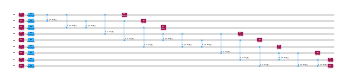

In [21]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import QAOAAnsatz

qubit_hamiltonian = op
qaoa_ansatz = QAOAAnsatz(cost_operator=qubit_hamiltonian, reps=1, initial_state=None, mixer_operator=None, name='QAOA')
qaoa_ansatz.decompose().decompose().decompose().draw(output='mpl', scale=0.1, fold=-10, style = "iqp") #.savefig("problem_qaoa_ckt-20qubits.png")

In [22]:
import numpy as np
import copy
from docplex.mp.model import Model
from qiskit.algorithms.optimizers import COBYLA
from qiskit.algorithms.minimum_eigensolvers import QAOA, NumPyMinimumEigensolver
from qiskit_optimization.algorithms import MinimumEigenOptimizer, CplexOptimizer
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.problems.variable import VarType
from qiskit_optimization.translators import from_docplex_mp

# Define a function to create the quadratic program using DOcplex
def create_problem(mu: np.array, sigma: np.array, total: int = 3) -> QuadraticProgram:
    mdl = Model()
    x = [mdl.binary_var(f"x{i}") for i in range(len(sigma))]

    objective = mdl.sum([mu[i] * x[i] for i in range(len(mu))])
    objective -= 2 * mdl.sum([sigma[i, j] * x[i] * x[j] for i in range(len(mu)) for j in range(len(mu))])
    mdl.maximize(objective)
    
    cost = mdl.sum(x)
    mdl.add_constraint(cost == total)

    qp = from_docplex_mp(mdl)
    return qp

# Define a function to relax the problem by changing variables to continuous
def relax_problem(problem) -> QuadraticProgram:
    relaxed_problem = copy.deepcopy(problem)
    for variable in relaxed_problem.variables:
        variable.vartype = VarType.CONTINUOUS

    return relaxed_problem

# Main execution
mu = np.array([3.418, 2.0913, 6.2415, 4.4436, 10.892, 3.4051])
sigma = np.array([[1.07978412, 0.00768914, 0.11227606, -0.06842969, -0.01016793, -0.00839765],
                   [0.00768914, 0.10922887, -0.03043424, -0.0020045, 0.00670929, 0.0147937],
                   [0.11227606, -0.03043424, 0.985353, 0.02307313, -0.05249785, 0.00904119],
                   [-0.06842969, -0.0020045, 0.02307313, 0.6043817, 0.03740115, -0.00945322],
                   [-0.01016793, 0.00670929, -0.05249785, 0.03740115, 0.79839634, 0.07616951],
                   [-0.00839765, 0.0147937, 0.00904119, -0.00945322, 0.07616951, 1.08464544]])

# Create the original binary problem
qubo = create_problem(mu, sigma)
print("Original Binary Problem:")
print(qubo.prettyprint())

# Solve the original binary problem classically
result = CplexOptimizer().solve(qubo)
print("\nClassical Solution to Binary Problem:")
print(result.prettyprint())

# Relax the problem by changing variables to continuous
relaxed_qubo = relax_problem(QuadraticProgramToQubo().convert(qubo))
print("\nRelaxed Continuous Problem:")
print(relaxed_qubo.prettyprint())

# Solve the relaxed continuous problem classically
sol = CplexOptimizer().solve(relaxed_qubo)
print("\nClassical Solution to Relaxed Continuous Problem:")
print(sol.prettyprint())

# Use the solution to the relaxed problem to warm-start QAOA
thetas = [2 * np.arcsin(np.sqrt(c_star)) for c_star in sol.samples[0].x]
init_qc = QuantumCircuit(len(sigma))
for idx, theta in enumerate(thetas):
    init_qc.ry(theta, idx)

# Apply QAOA to the original binary problem with warm-start
qaoa_mes = QAOA(sampler=Sampler(), optimizer=COBYLA(), initial_point=[0.0, 1.0])
qaoa = MinimumEigenOptimizer(qaoa_mes)
qaoa_result = qaoa.solve(qubo)
print("\nQAOA Solution to Binary Problem:")
print(qaoa_result.prettyprint())

# Apply Warm-Start QAOA to the original binary problem
ws_qaoa_mes = QAOA(sampler=Sampler(), optimizer=COBYLA(), initial_state=init_qc, initial_point=[0.0, 1.0])
ws_qaoa = MinimumEigenOptimizer(ws_qaoa_mes)
ws_qaoa_result = ws_qaoa.solve(qubo)
print("\nWarm-Start QAOA Solution to Binary Problem:")
print(ws_qaoa_result.prettyprint())


Original Binary Problem:
Problem name: docplex_model2

Maximize
  -2.15956824*x0^2 - 0.03075656*x0*x1 - 0.44910424*x0*x2 + 0.27371876*x0*x3
  + 0.04067172*x0*x4 + 0.0335906*x0*x5 - 0.21845774*x1^2 + 0.12173696*x1*x2
  + 0.008018*x1*x3 - 0.02683716*x1*x4 - 0.0591748*x1*x5 - 1.970706*x2^2
  - 0.09229252*x2*x3 + 0.2099914*x2*x4 - 0.03616476*x2*x5 - 1.2087634*x3^2
  - 0.1496046*x3*x4 + 0.03781288*x3*x5 - 1.59679268*x4^2 - 0.30467804*x4*x5
  - 2.16929088*x5^2 + 3.418*x0 + 2.0913*x1 + 6.2415*x2 + 4.4436*x3 + 10.892*x4
  + 3.4051*x5

Subject to
  Linear constraints (1)
    x0 + x1 + x2 + x3 + x4 + x5 == 3  'c0'

  Binary variables (6)
    x0 x1 x2 x3 x4 x5


Classical Solution to Binary Problem:
objective function value: 16.7689322
variable values: x0=0.0, x1=0.0, x2=1.0, x3=1.0, x4=1.0, x5=0.0
status: SUCCESS

Relaxed Continuous Problem:
Problem name: docplex_model2

Minimize
  44.84880018*x0^2 + 85.40922044*x0*x1 + 85.82756812*x0*x2
  + 85.10474511999999*x0*x3 + 85.33779215999999*x0*x4 + 85

In [23]:
from qiskit import QuantumCircuit

thetas = [2 * np.arcsin(np.sqrt(c_star)) for c_star in c_stars]

init_qc = QuantumCircuit(len(sigma))
for idx, theta in enumerate(thetas):
    init_qc.ry(theta, idx)

init_qc.draw(output="mpl")


CircuitError: 'Index 6 out of range for size 6.'